# Project Name - Cardiovascular Risk Prediction

- Project Type - Cardiovascular Risk Prediction
- Contribution - Group
- Team Member 1 - Vipil Khapre
- Team Member 2 - Pranay Kuthe

# GitHub Link 

https://github.com/Vipilkhapre/Cardiovascular-Risk-Prediction

# Problem Statement (Data Set Information)

The dataset is from an ongoing cardiovascular study on residents of the town of
Framingham, Massachusetts. The classification goal is to predict whether the
patient has a 10-year risk of future coronary heart disease (CHD). The dataset
provides the patients’ information. It includes over 4,000 records and 15
attributes. Each attribute is a potential risk factor. There are both demographic,
behavioral, and medical risk factors.


# Let's Begin !

## ***1. Know Your Data***

### Import Libraries

In [218]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [220]:
df = pd.read_csv('data_cardiovascular_risk.csv')

### Dataset First and last View

In [222]:
# Dataset first 
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [223]:
# Dataset last 
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [225]:
# Dataset Rows and Columns
df.shape

(3390, 17)

### Dataset Information

In [227]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

### What did you know about your dataset?

The dataset originates from an ongoing cardiovascular study in Framingham, Massachusetts, aimed at predicting whether patients face a 10-year risk of coronary heart disease (CHD). It encompasses more than 4,000 records, featuring 15 attributes encompassing demographic, behavioral, and medical factors. Demographic aspects include "Sex" for gender (coded as "M" or "F"), while "Age" denotes age, treated as continuous even if recorded as whole numbers. Behavioral features incorporate "is_smoking" denoting current smoking status ("YES" or "NO"), and "Cigs Per Day" indicating daily average cigarettes, potentially treated as continuous due to variable values. Medical history attributes comprise "BP Meds" for blood pressure medication, "Prevalent Stroke" for past stroke history, "Prevalent Hyp" for hypertension status, and "Diabetes" for diabetes status – all nominal variables. Present medical attributes include continuous measures like "Tot Chol" (total cholesterol), "Sys BP" (systolic blood pressure), "Dia BP" (diastolic blood pressure), "BMI" (Body Mass Index), "Heart Rate," and "Glucose" levels. The target, "10-year risk of CHD," is binary: "1" for positive risk and "0" for negative risk – the focus of predictive models based on these attributes.

### Checking missing values

In [231]:
# Checking missing values in the dataset
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

##### As we start with a limited set of rows of 3390, we must try to fill the null values strategically instead of dropping them.

#### Handling missing values

As 'education' and 'BPMeds' are categorical variables we will use mode to fill the null values

In [235]:
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [236]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [237]:
#Creating a function for filling na values in categorical columns
def mode_fillna(data, columns): #Null values of categorical columns are filled with mode of that particular column
    for col in columns:
        data[col] = data[col].fillna(data[col].mode()[0])
        
mode_fillna(data = df, columns = ['education','BPMeds'])

<Axes: >

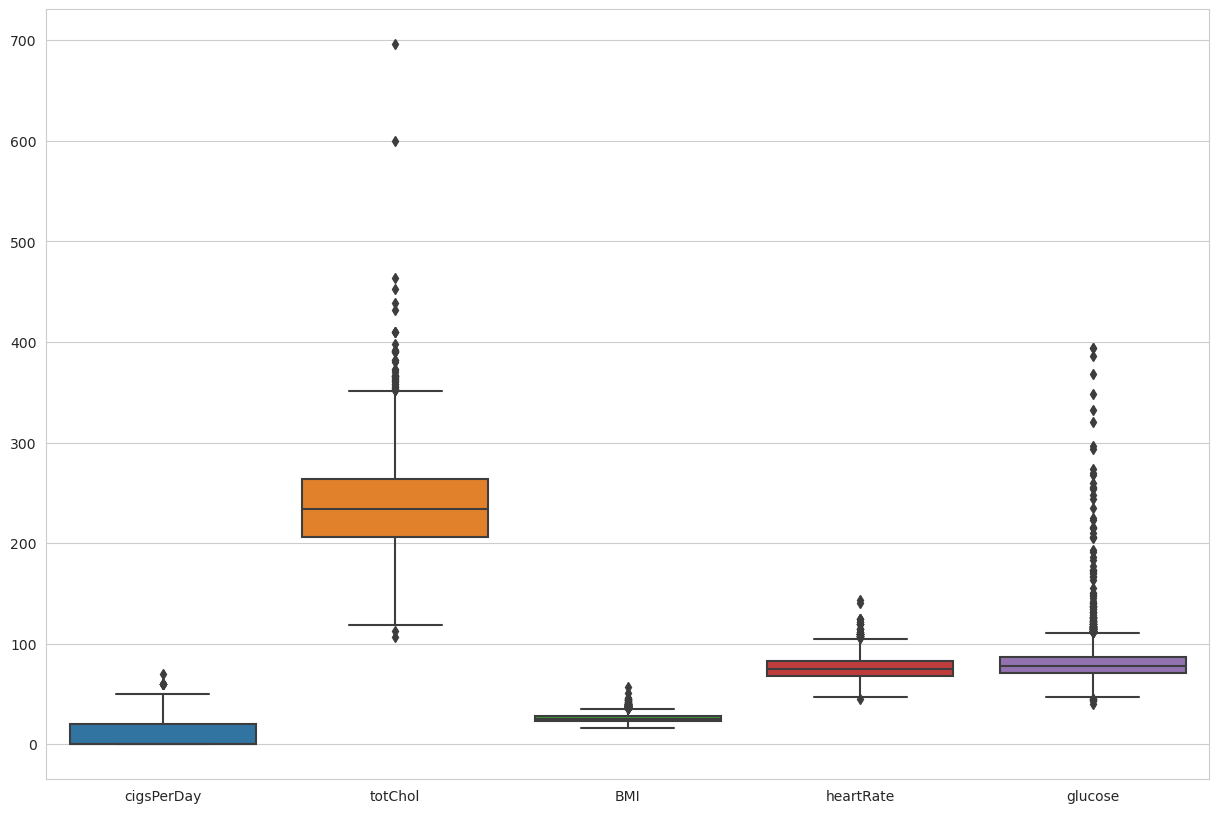

In [238]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df[['cigsPerDay','totChol','BMI','heartRate','glucose']])

As we can see that there are some outliers present in the columna of the dataset, hence using median for filling null values 

In [240]:
# Creating a function for filling na values in Numerical columns
def median_fillna(data, columns):   # Null values of numerical columns are filled with mode of that particular column
    for col in columns:
        data[col] = data[col].fillna(data[col].median())
        
median_fillna(data = df, columns =['cigsPerDay','totChol','BMI','heartRate','glucose'])

<Axes: >

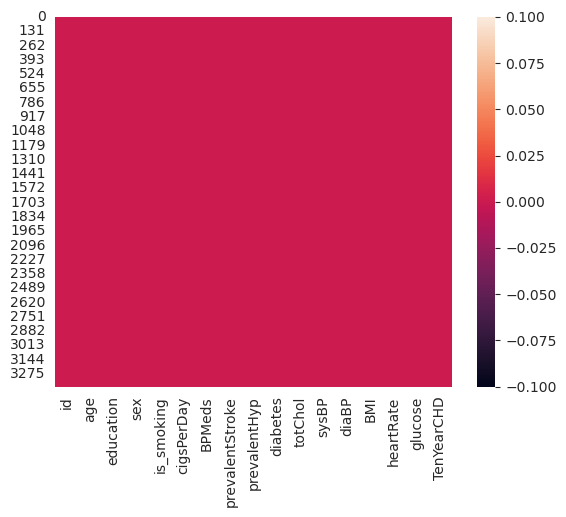

In [241]:
sns.heatmap(df.isnull())

In [242]:
# No cigarettes smoked though the smoking column is yes
df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,0.0,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,0.0,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,0.0,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,78.0,0
491,491,61,1.0,F,YES,0.0,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,0.0,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,0.0,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,0.0,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,0.0,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,1.0,F,YES,0.0,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,0.0,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


As seen above there are entries where the 'is_smoking' column says 'YES' but there are no cigarettes smoked.

In [244]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [245]:
df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0),'is_smoking'] = 'NO'

In [246]:
df['is_smoking'].value_counts()

NO     1725
YES    1665
Name: is_smoking, dtype: int64

As per above code the entries that contains 'YES' in 'is_somking' columns are changes to 'NO' sucessfully

## ***2. Understanding Your Variables***

In [249]:
# Dataset columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Description of variables of the dataframe

In [251]:
# Shoing statistical information for the dataset
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.946018,NaN,NaN,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,978.753033,8.592878,1.017568,NaN,NaN,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


### Variables Description

- Sex - Gender
- Age - age
- is_smoking - whether smoking currently or not
- Cigs-Per_day - Cigarettes smoked per day
- BP-Meds - Whether taking BP meds or not
- Prevalent Stroke - If the patient has a history of stroke
- Prevalent hyp - If the patient has a history of hypertension
- Diabetes - Patient has diabetes or not
- Tot Chol - Cholesterol measur
- Sys BP - BP measure
- Dia BP - BP measure
- BMI - Body Mass Index
- Heart Rate - Heart Rate measure
- Glucose: glucose level (Continuous)

Predict variable (desired target):

- 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

### Check Unique Values for each variable.

In [255]:
for i in df.columns.tolist():
    print(f"number of unique values in {i} is {df[i].nunique()}")

number of unique values in id is 3390
number of unique values in age is 39
number of unique values in education is 4
number of unique values in sex is 2
number of unique values in is_smoking is 2
number of unique values in cigsPerDay is 32
number of unique values in BPMeds is 2
number of unique values in prevalentStroke is 2
number of unique values in prevalentHyp is 2
number of unique values in diabetes is 2
number of unique values in totChol is 240
number of unique values in sysBP is 226
number of unique values in diaBP is 142
number of unique values in BMI is 1259
number of unique values in heartRate is 68
number of unique values in glucose is 132
number of unique values in TenYearCHD is 2


### Check duplicate values.

In [257]:
# There is no duplicate value in the dataset
df.duplicated().sum()

0

### Dropping Row

In [259]:
df.drop('id',axis = 1,inplace = True)

# Handling the outliers

<Axes: >

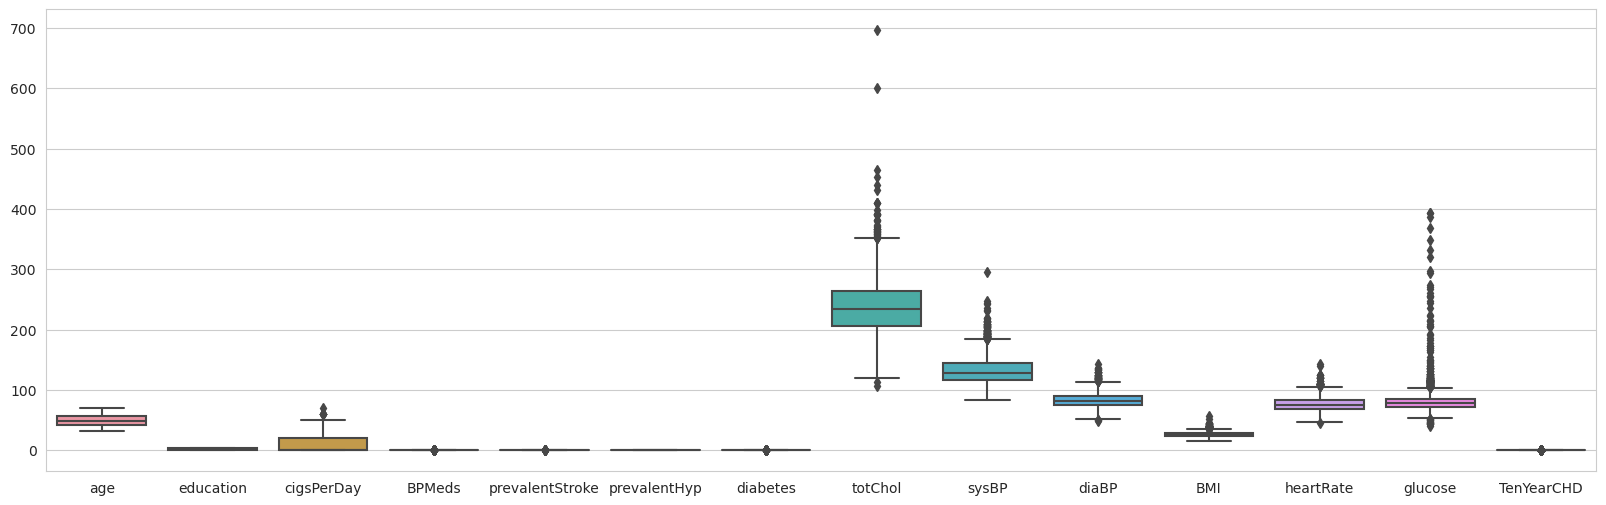

In [261]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,6))
sns.boxplot(data = df)

As we can see that in the above chart there are outliers available in the columns of the dataset,hence creating the function below to remove the outliers from the dataset

In [263]:
def outlier_col(columns):
    outliers_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal'])
    
    for col in columns:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        iqr = q3 - q1
        ul = q3 + 1.5*(iqr)
        ll = q1 - 1.5*(iqr)
        
        upper_removal = dict(df[df[col] > ul]['TenYearCHD'].value_counts())
        lower_removal = dict(df[df[col] < ll]['TenYearCHD'].value_counts())
        
        input_dict = {'Column' : col,
                      'Upper Limit' : ul,
                      'Lower Limit' : ll,
                      'Upper Removal': ul,
                      'Lower Removal' : ll}
        
        outliers_df = outliers_df.append(input_dict, ignore_index = True)
        
    return outliers_df



In [264]:
outlier_col(['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])

,Column,Upper Limit,Lower Limit,Upper Removal,Lower Removal
0,cigsPerDay,50.00000,-30.00000,50.00000,-30.00000
1,totChol,351.00000,119.00000,351.00000,119.00000
2,sysBP,184.50000,76.50000,184.50000,76.50000
3,diaBP,113.25000,51.25000,113.25000,51.25000
4,BMI,35.44875,15.57875,35.44875,15.57875
5,heartRate,105.50000,45.50000,105.50000,45.50000
6,glucose,104.50000,52.50000,104.50000,52.50000


# Exploratory Data Analysis

In [266]:
d = pd.DataFrame(df.groupby('sex')['is_smoking'].value_counts().reset_index(name='No.of People'))
pivot_table = d.pivot(index='sex', columns='is_smoking', values='No.of People')
pivot_table.columns = ['No.of People - No Smoking', 'No.of People - Smoking']
pivot_table.reset_index()

,sex,No.of People - No Smoking,No.of People - Smoking
0,F,1157,766
1,M,568,899


In [267]:
filtered_value = df[df['diabetes'] == 1]
filtered_value.groupby(['age','sex']).size().reset_index(name = 'No of people').sort_values(by = 'No of people', ascending = False)\
.reset_index(drop = True).head(5)

,age,sex,No of people
0,52,M,8
1,47,F,5
2,62,F,5
3,58,F,5
4,50,F,4


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

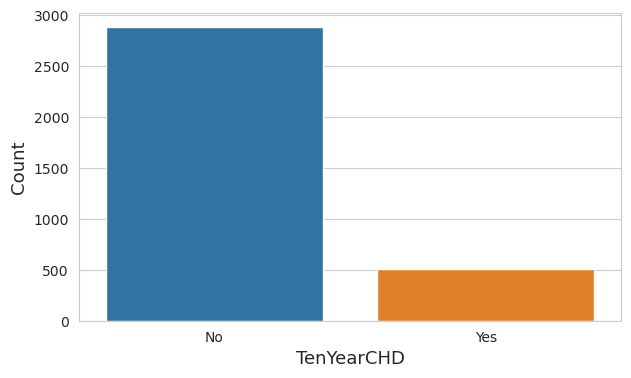

In [410]:
# Distribution of our dependent variable
plt.figure(figsize = (7,4))
sns.countplot(data=df, x='TenYearCHD')
plt.xlabel('TenYearCHD', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks([0, 1], ['No', 'Yes'])  # Adding custom x-axis labels
plt.show()

# not working
# sns.countplot(data['TenYearCHD'])

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In [278]:
# Creating a list for different column types
categorical_columns = ['sex','is_smoking','education','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

#### Chart - 2

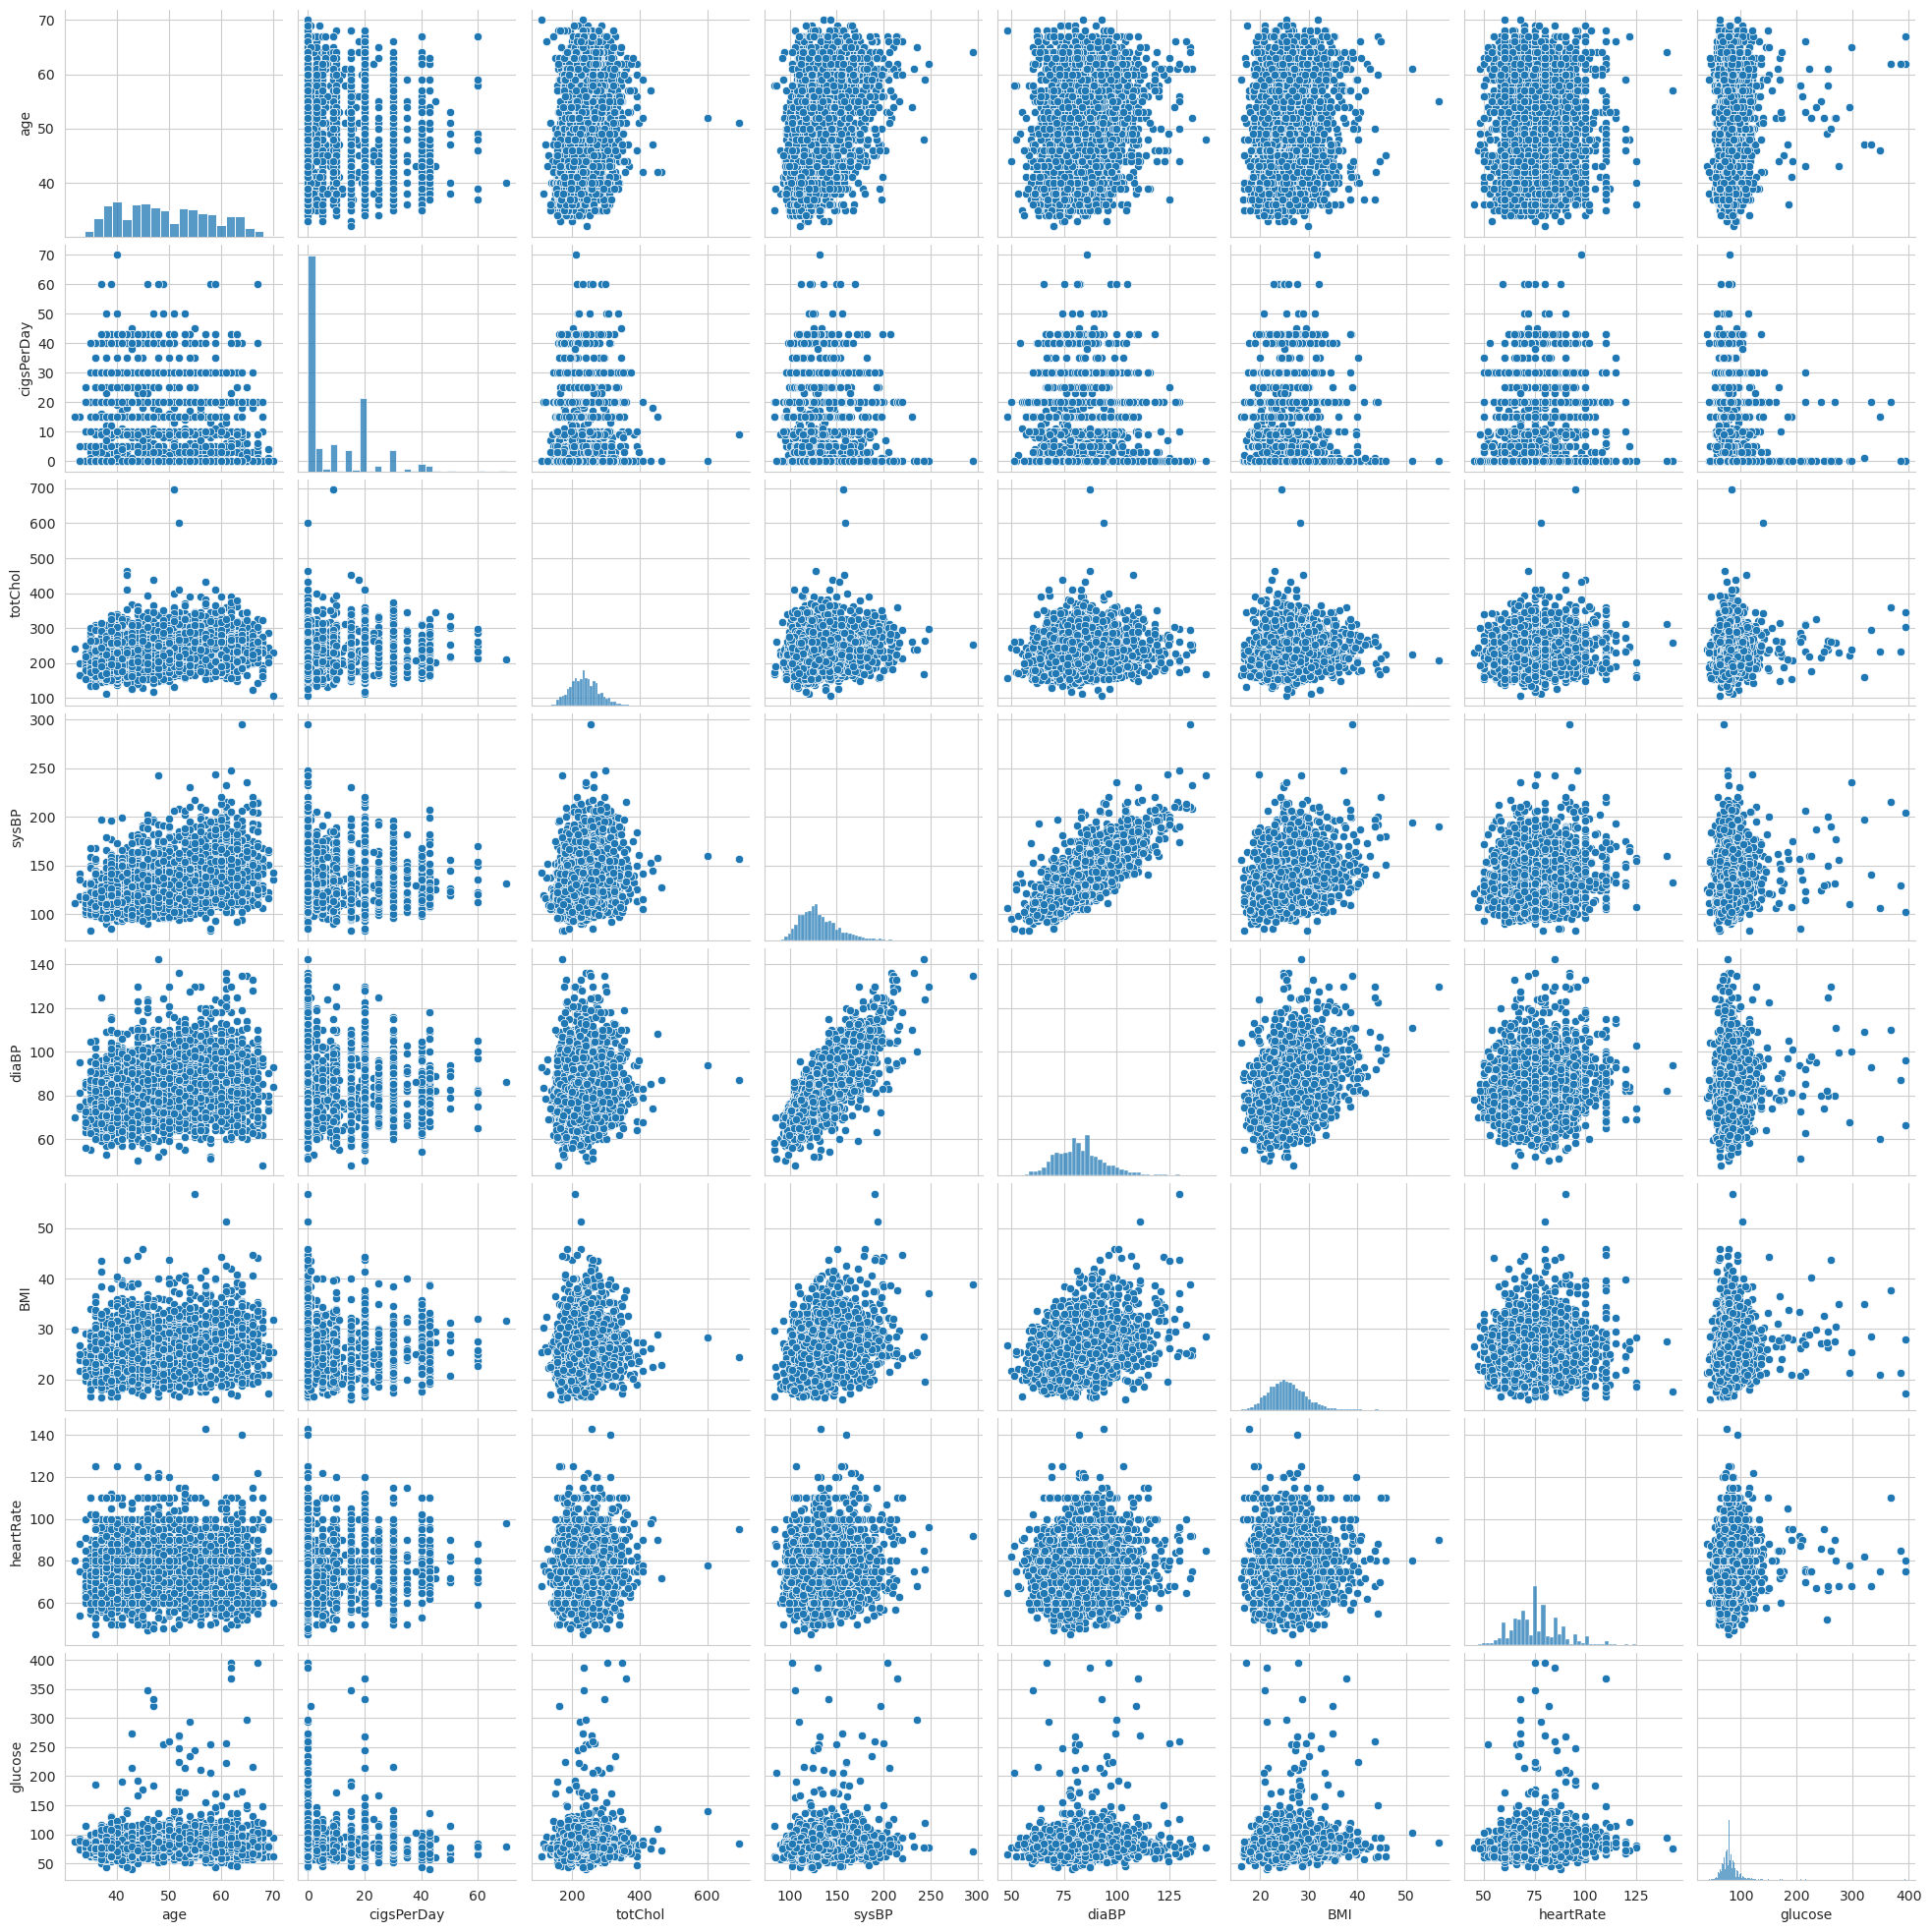

In [280]:
sns.pairplot(df[numerical_columns])
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

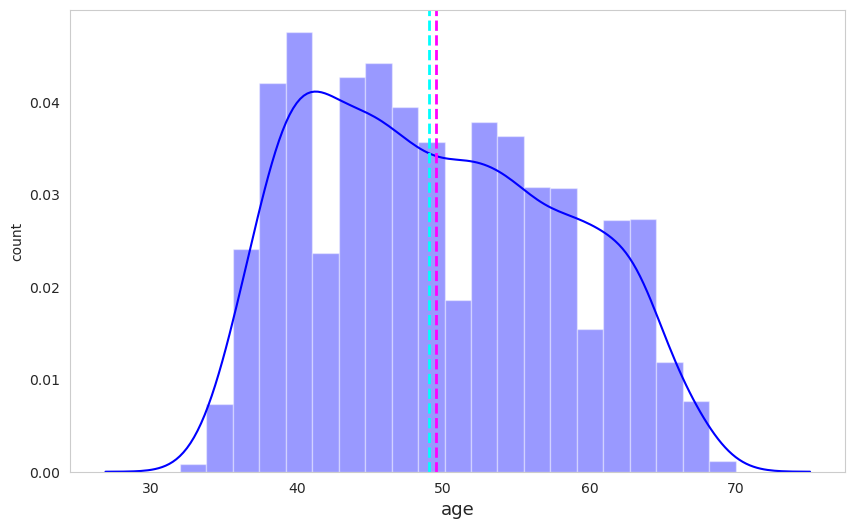

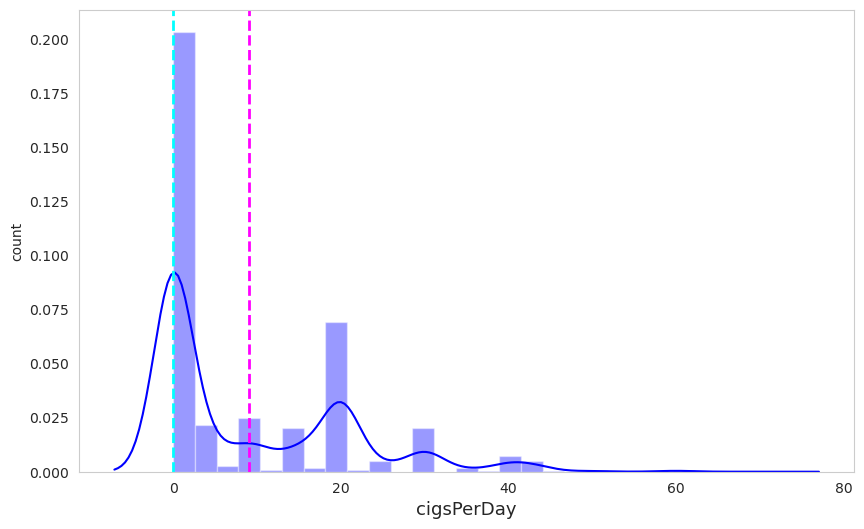

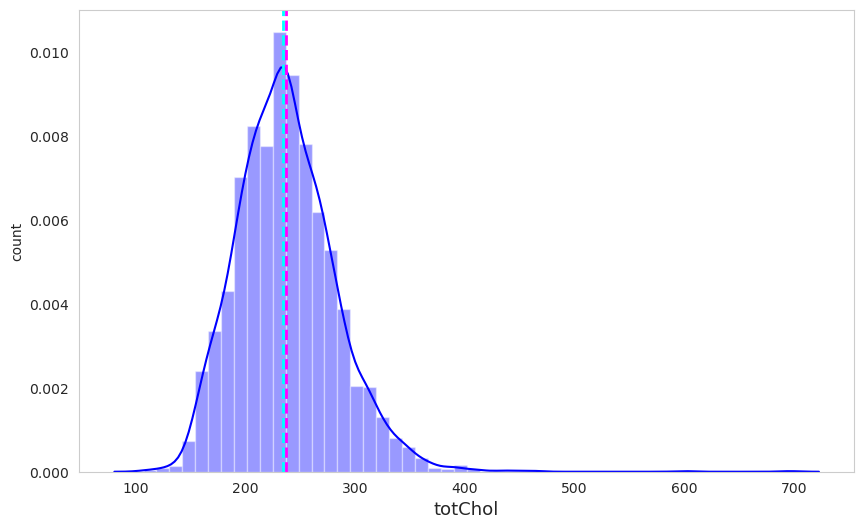

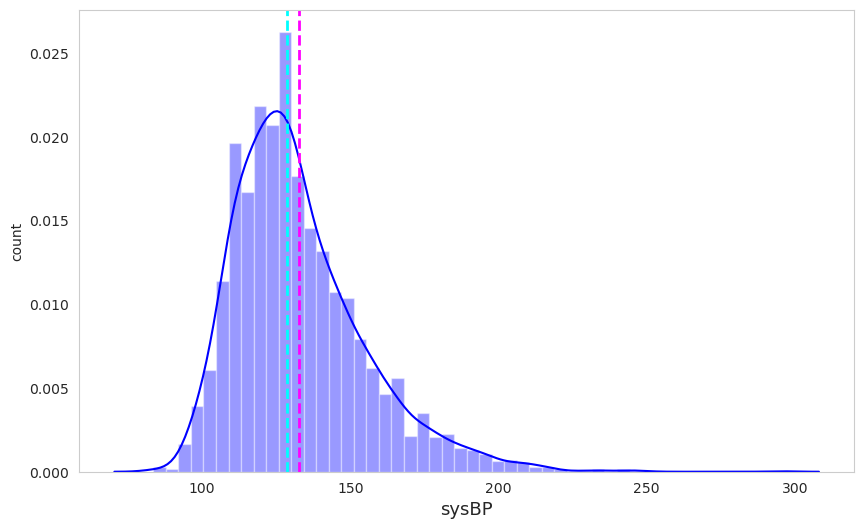

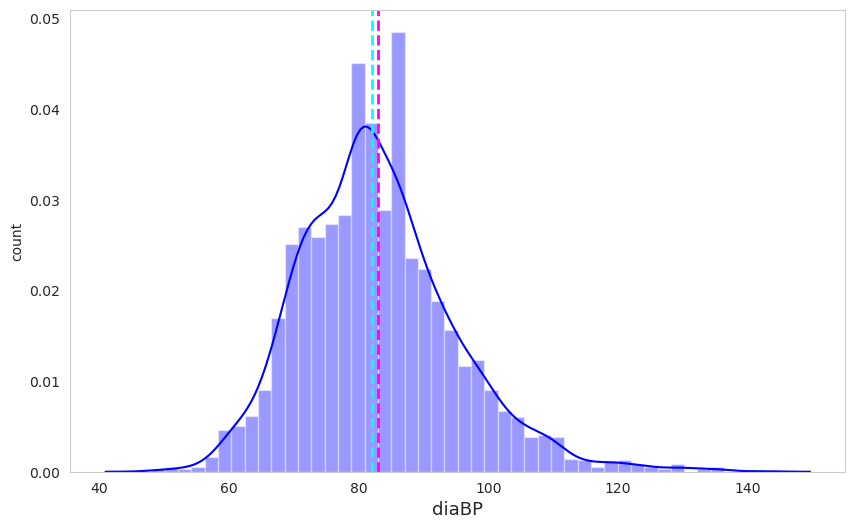

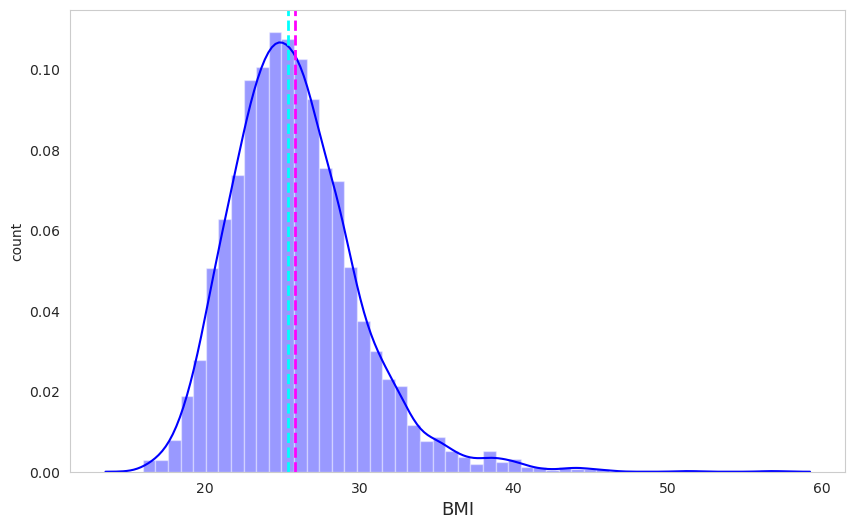

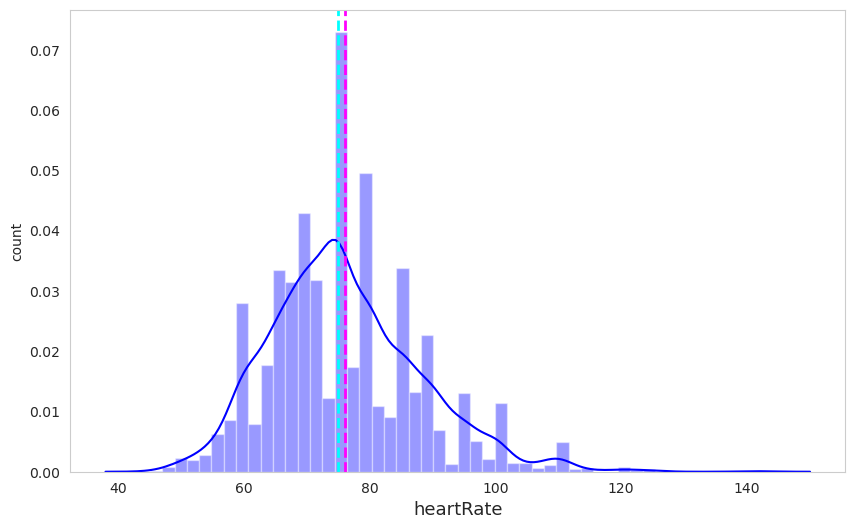

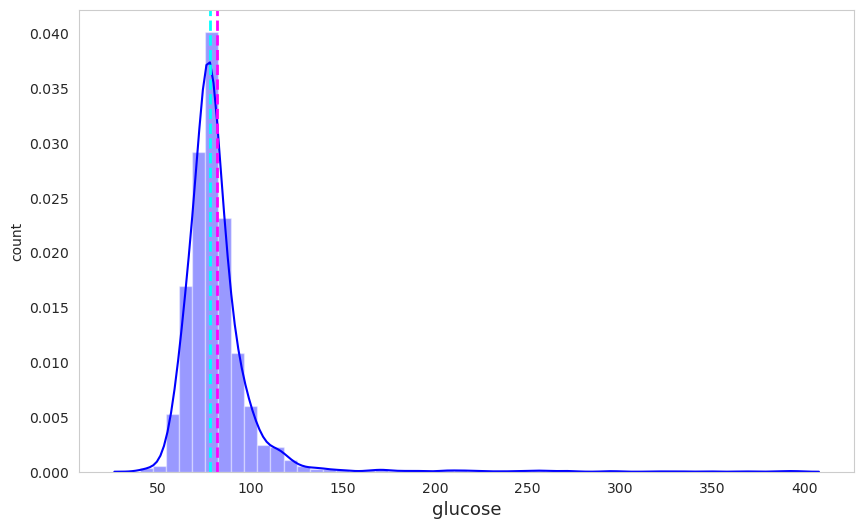

In [284]:
# Plotting the distribution of all features.
for col in df[numerical_columns].columns:
        plt.figure(figsize=(10, 6))
        sns.distplot(df[col], color='blue')
        #PLotting the mean and median
        plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
        plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
        plt.xlabel(col, fontsize=13)
        plt.ylabel('count')
        plt.grid()
        plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4

In [296]:
df['cigsPerDay'] = df['cigsPerDay'].astype(int)

In [302]:
df['cigsPerDay'].unique()

array([ 3,  0, 10, 20, 30, 35, 40, 15,  9, 60, 17, 25,  5, 43,  7, 50, 19,
       18,  1, 45,  2,  6, 11,  8,  4, 14, 16, 23, 13, 12, 70, 38])

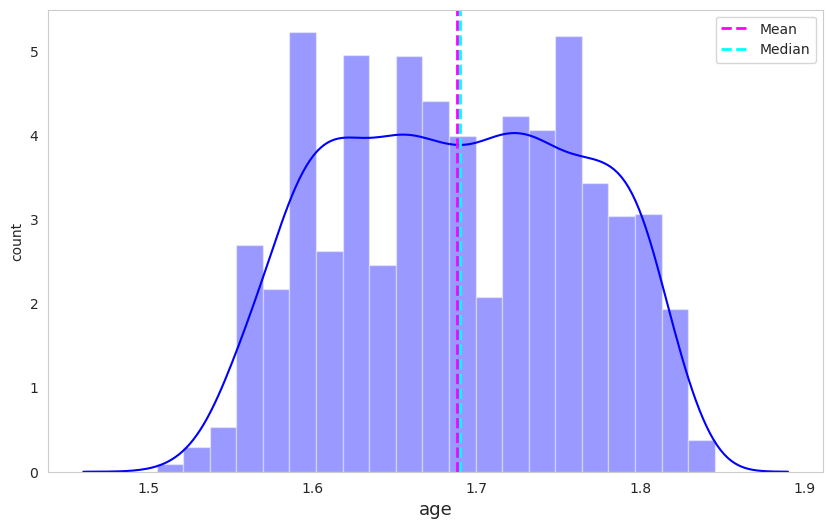

<Figure size 1000x600 with 0 Axes>

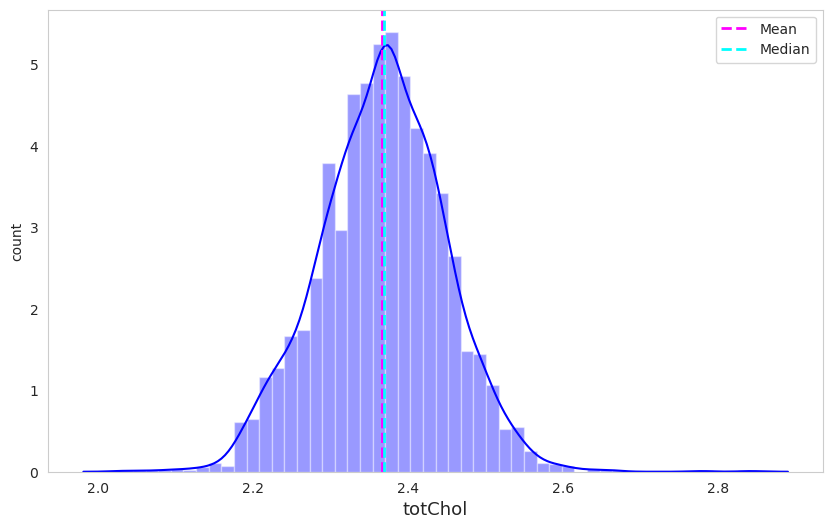

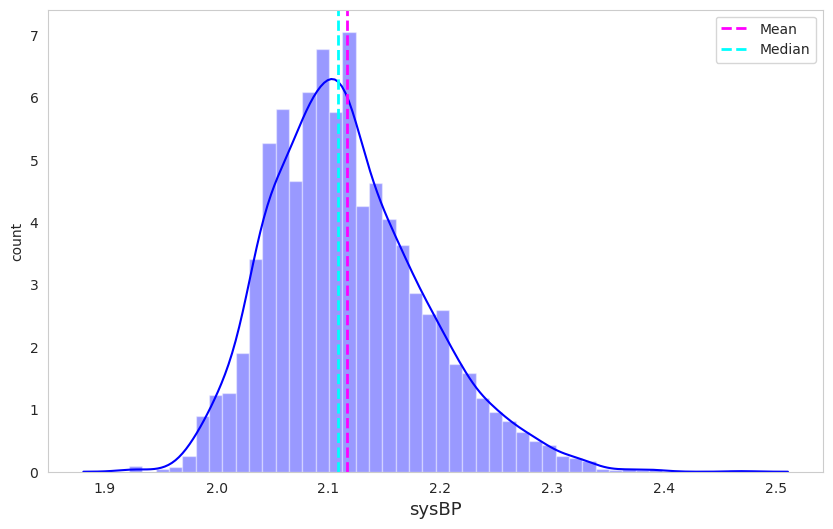

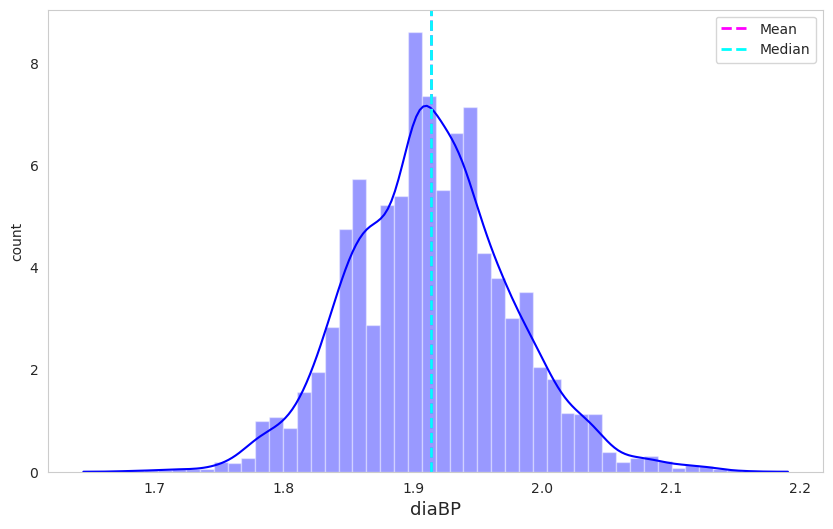

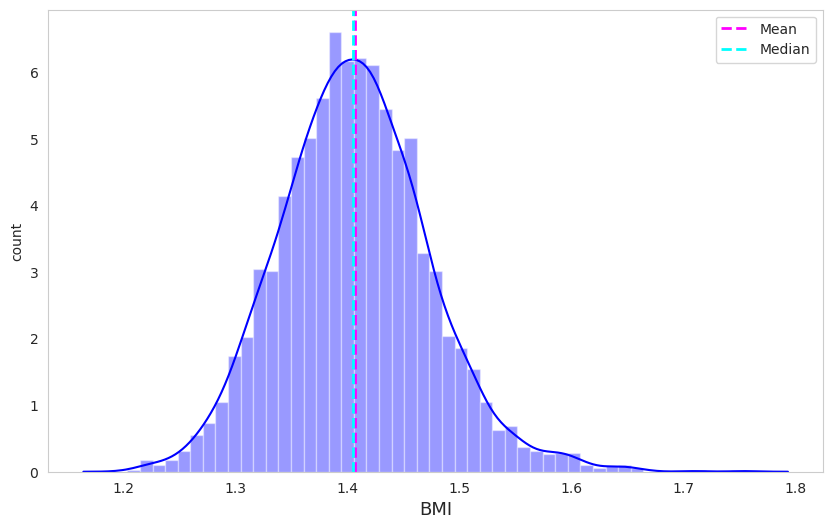

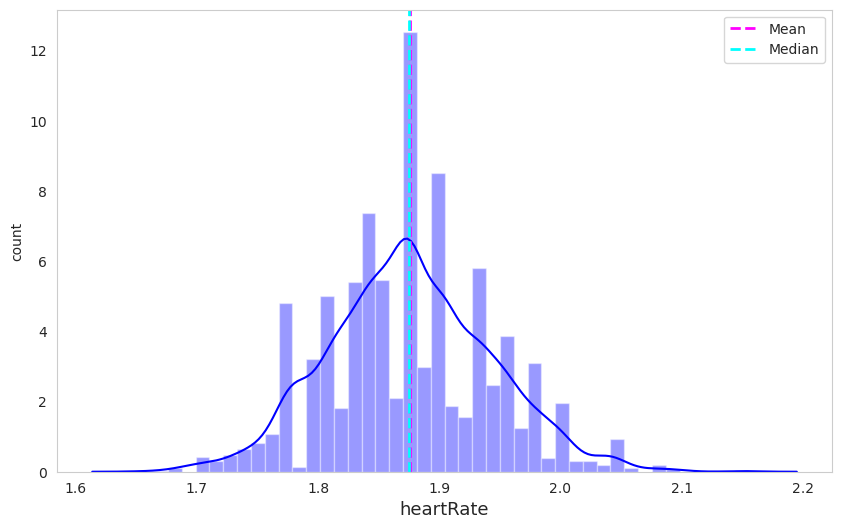

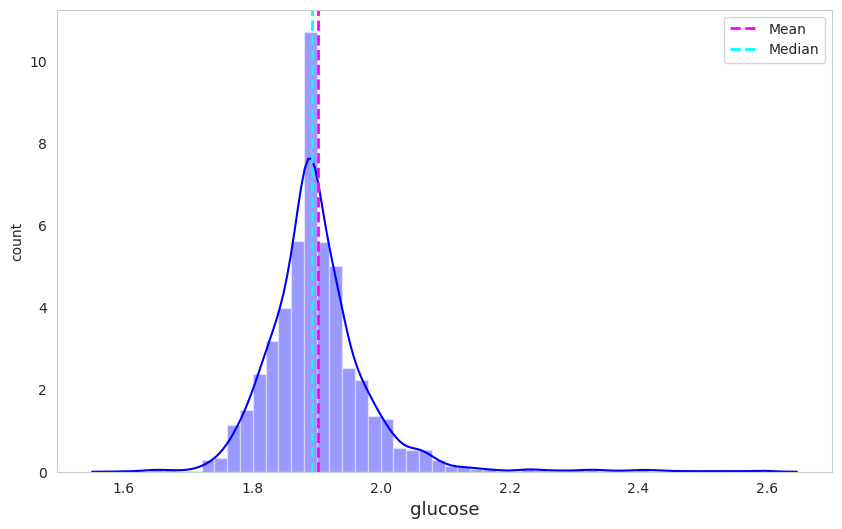

In [304]:
for col in df[numerical_columns].columns:
    plt.figure(figsize=(10, 6))
    col_values = df[col].dropna()  # Remove NaN values
    if col != 'cigsPerDay':
        try:
            transformed_col = np.log10(col_values)
            sns.distplot(transformed_col, color='blue')
            plt.axvline(transformed_col.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
            plt.axvline(transformed_col.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
            plt.xlabel(col, fontsize=13)
            plt.ylabel('count')
            plt.legend()
            plt.grid()
            plt.show()
        except ValueError as e:
            print(f"Error in column '{col}': {e}")

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 5

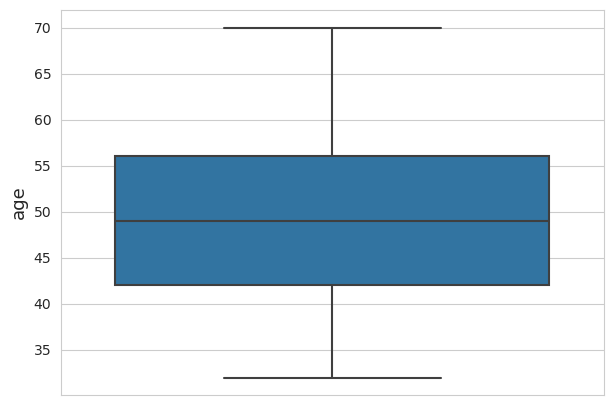

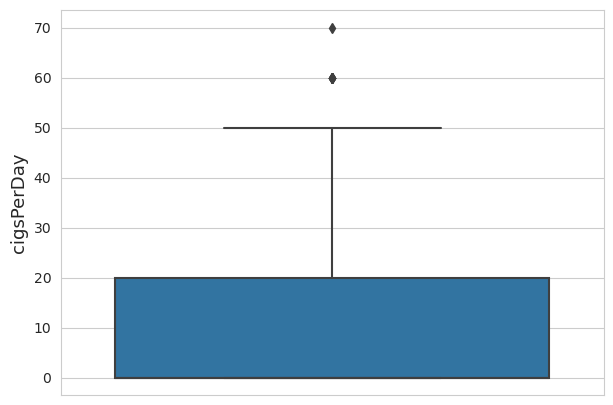

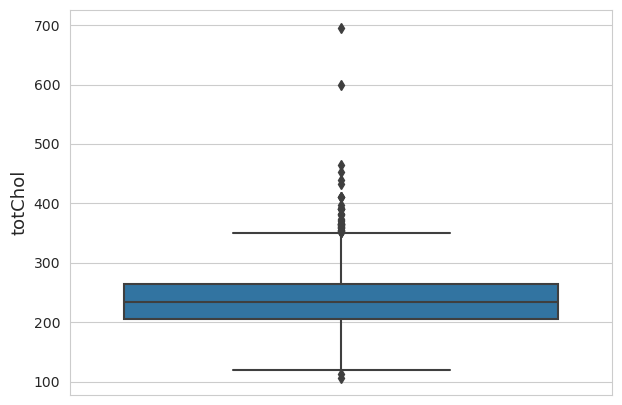

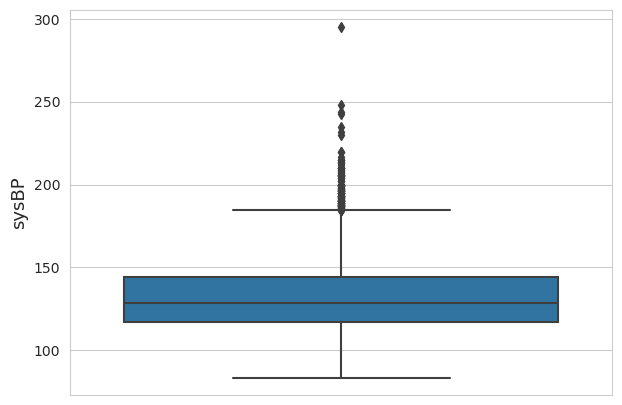

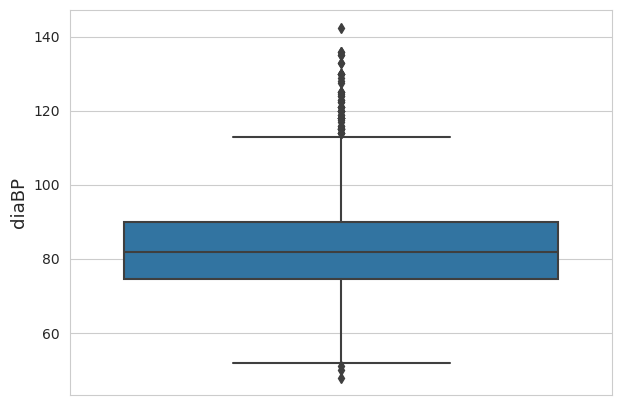

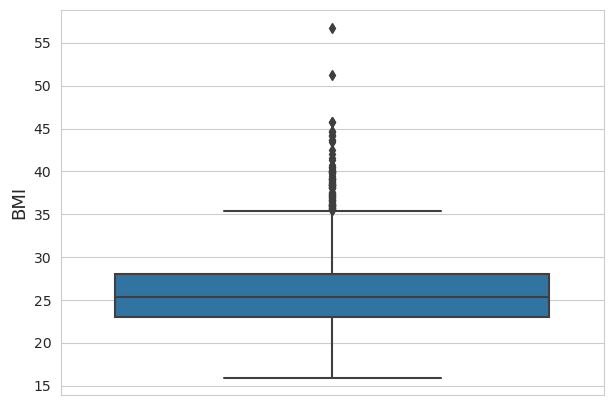

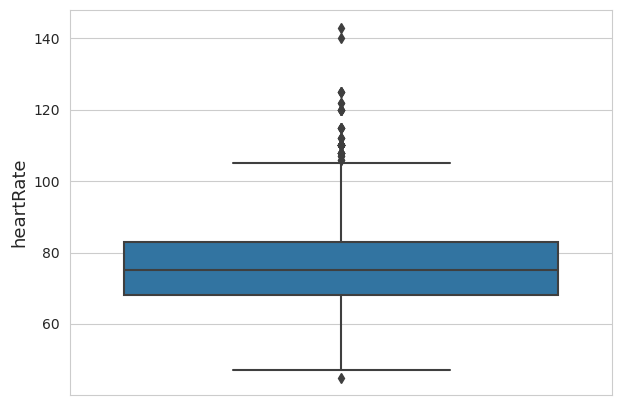

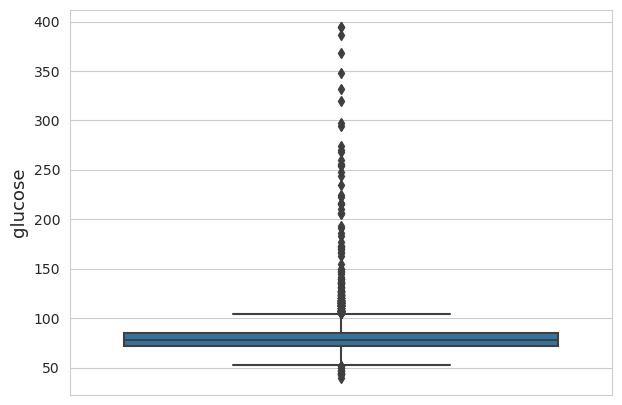

In [376]:
#  For numerical data
for col in df[numerical_columns].columns:
    sns.set_style("whitegrid")
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, y=col)
    plt.ylabel(col, fontsize=13)
    plt.show()
    

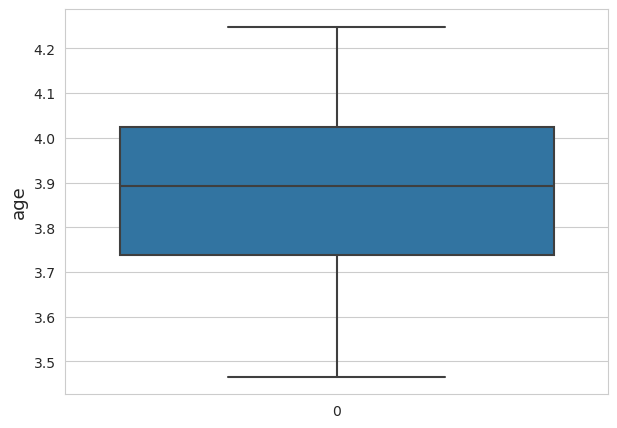

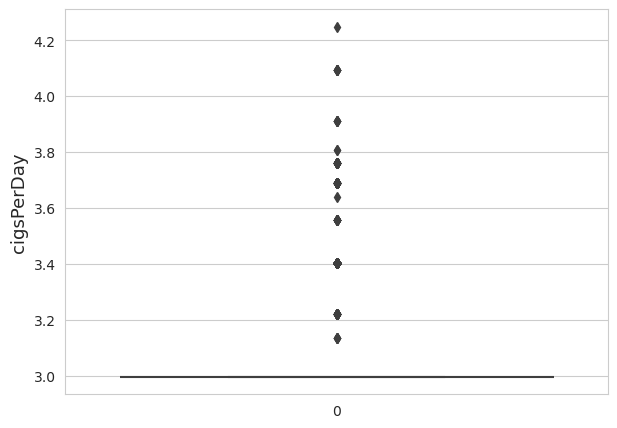

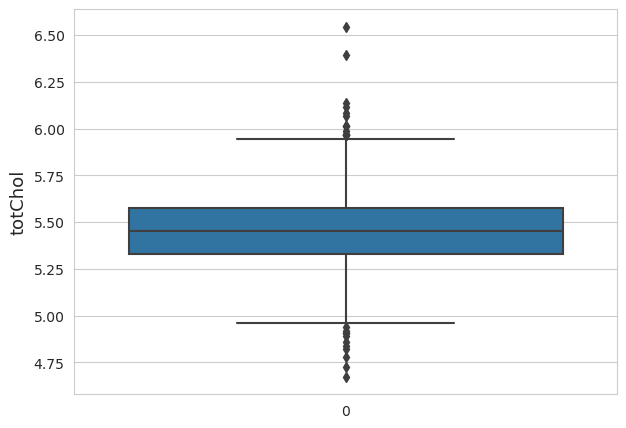

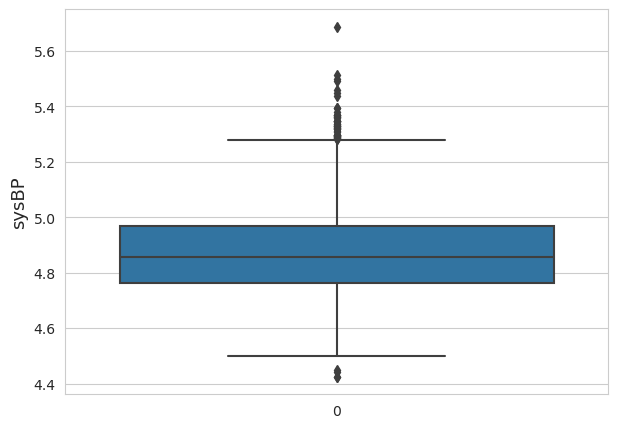

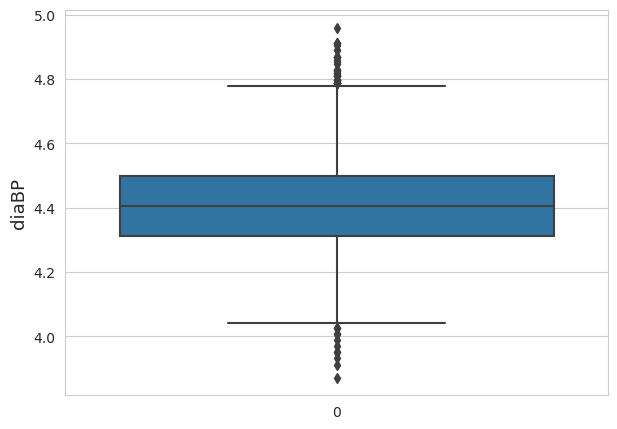

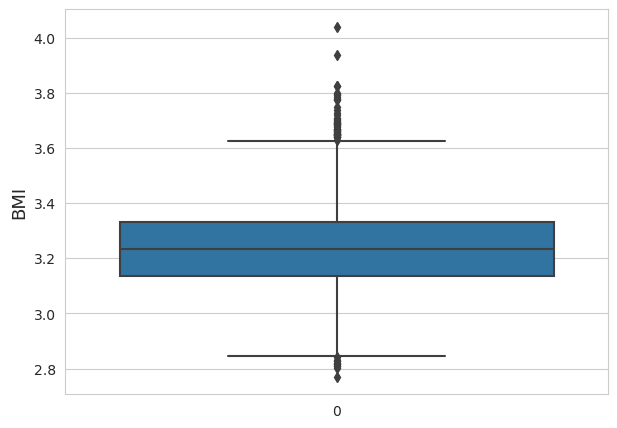

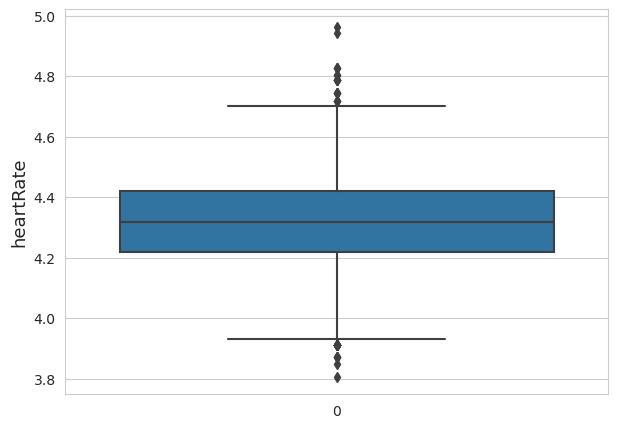

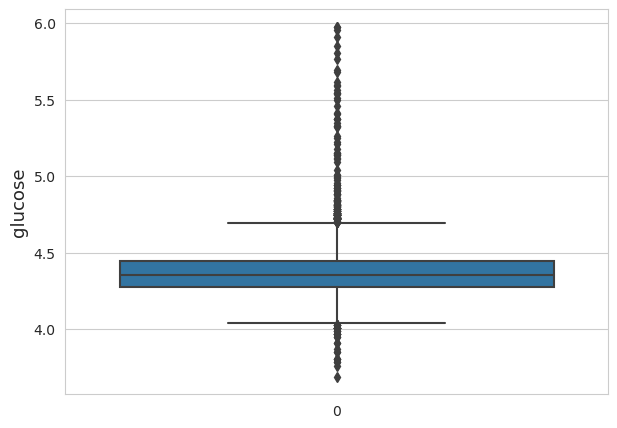

In [382]:
# Problem with the code outlier removal

for col in df[numerical_columns].columns:
    plt.figure(figsize=(7, 5))
    sns.set_style("whitegrid")
    transformed_col = np.log(df[col])  # Logarithmic transformation
    sns.boxplot(data=transformed_col)   # Plot the transformed data
    plt.ylabel(col, fontsize=13)
    
    plt.show()



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 6

In [ ]:
# Which gender is prone to coronary heart disease?
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 7

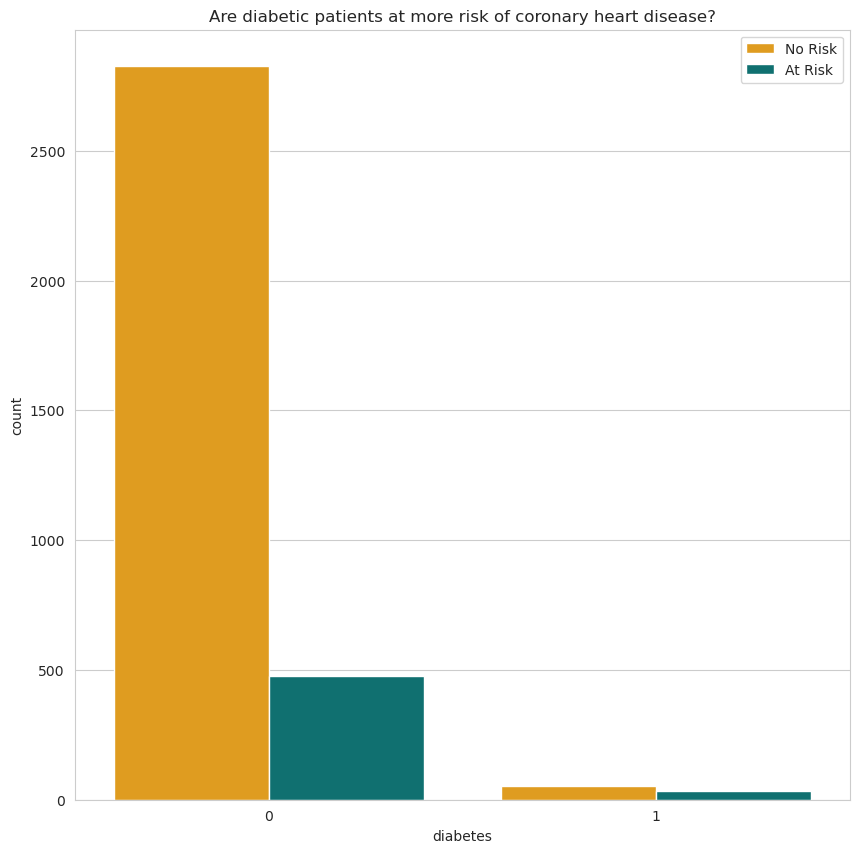

In [443]:
# Are diabetic patients at more risk of coronary heart disease ??
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()
     

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 8

<Axes: >

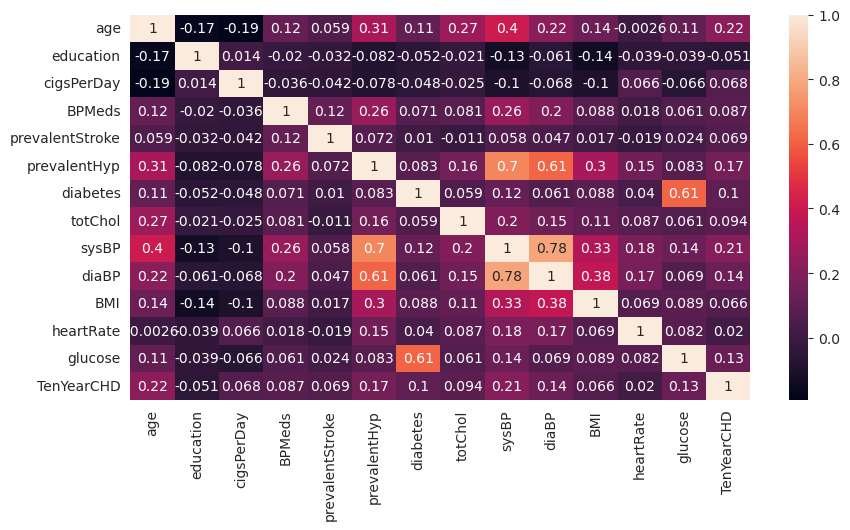

In [402]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing